In [16]:
import numpy as np
import pandas as pd
import os
for dirname, _, filenames in os.walk('heart_failure_clinical_records.csv'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import precision_recall_fscore_support, accuracy_score
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix

In [18]:
df = pd.read_csv('heart_failure_clinical_records.csv')
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,55.0,0,748,0,45,0,263358.03,1.3,137,1,1,88,0
1,65.0,0,56,0,25,0,305000.00,5.0,130,1,0,207,0
2,45.0,0,582,1,38,0,319000.00,0.9,140,0,0,244,0
3,60.0,1,754,1,40,1,328000.00,1.2,126,1,0,90,0
4,95.0,1,582,0,30,0,461000.00,2.0,132,1,0,50,1


In [19]:
df.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,60.288736,0.474400,586.760600,0.439400,37.734600,0.364800,265075.404370,1.369106,136.808200,0.645600,0.311800,130.678800,0.313600
std,11.697243,0.499394,976.733979,0.496364,11.514855,0.481422,97999.758622,1.009750,4.464236,0.478379,0.463275,77.325928,0.464002
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.500000,113.000000,0.000000,0.000000,4.000000,0.000000
25%,50.000000,0.000000,121.000000,0.000000,30.000000,0.000000,215000.000000,0.900000,134.000000,0.000000,0.000000,74.000000,0.000000
50%,60.000000,0.000000,248.000000,0.000000,38.000000,0.000000,263358.030000,1.100000,137.000000,1.000000,0.000000,113.000000,0.000000
75%,68.000000,1.000000,582.000000,1.000000,45.000000,1.000000,310000.000000,1.400000,140.000000,1.000000,1.000000,201.000000,1.000000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.400000,148.000000,1.000000,1.000000,285.000000,1.000000


In [20]:
df.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

In [21]:
df.shape

(5000, 13)

In [22]:
df.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')

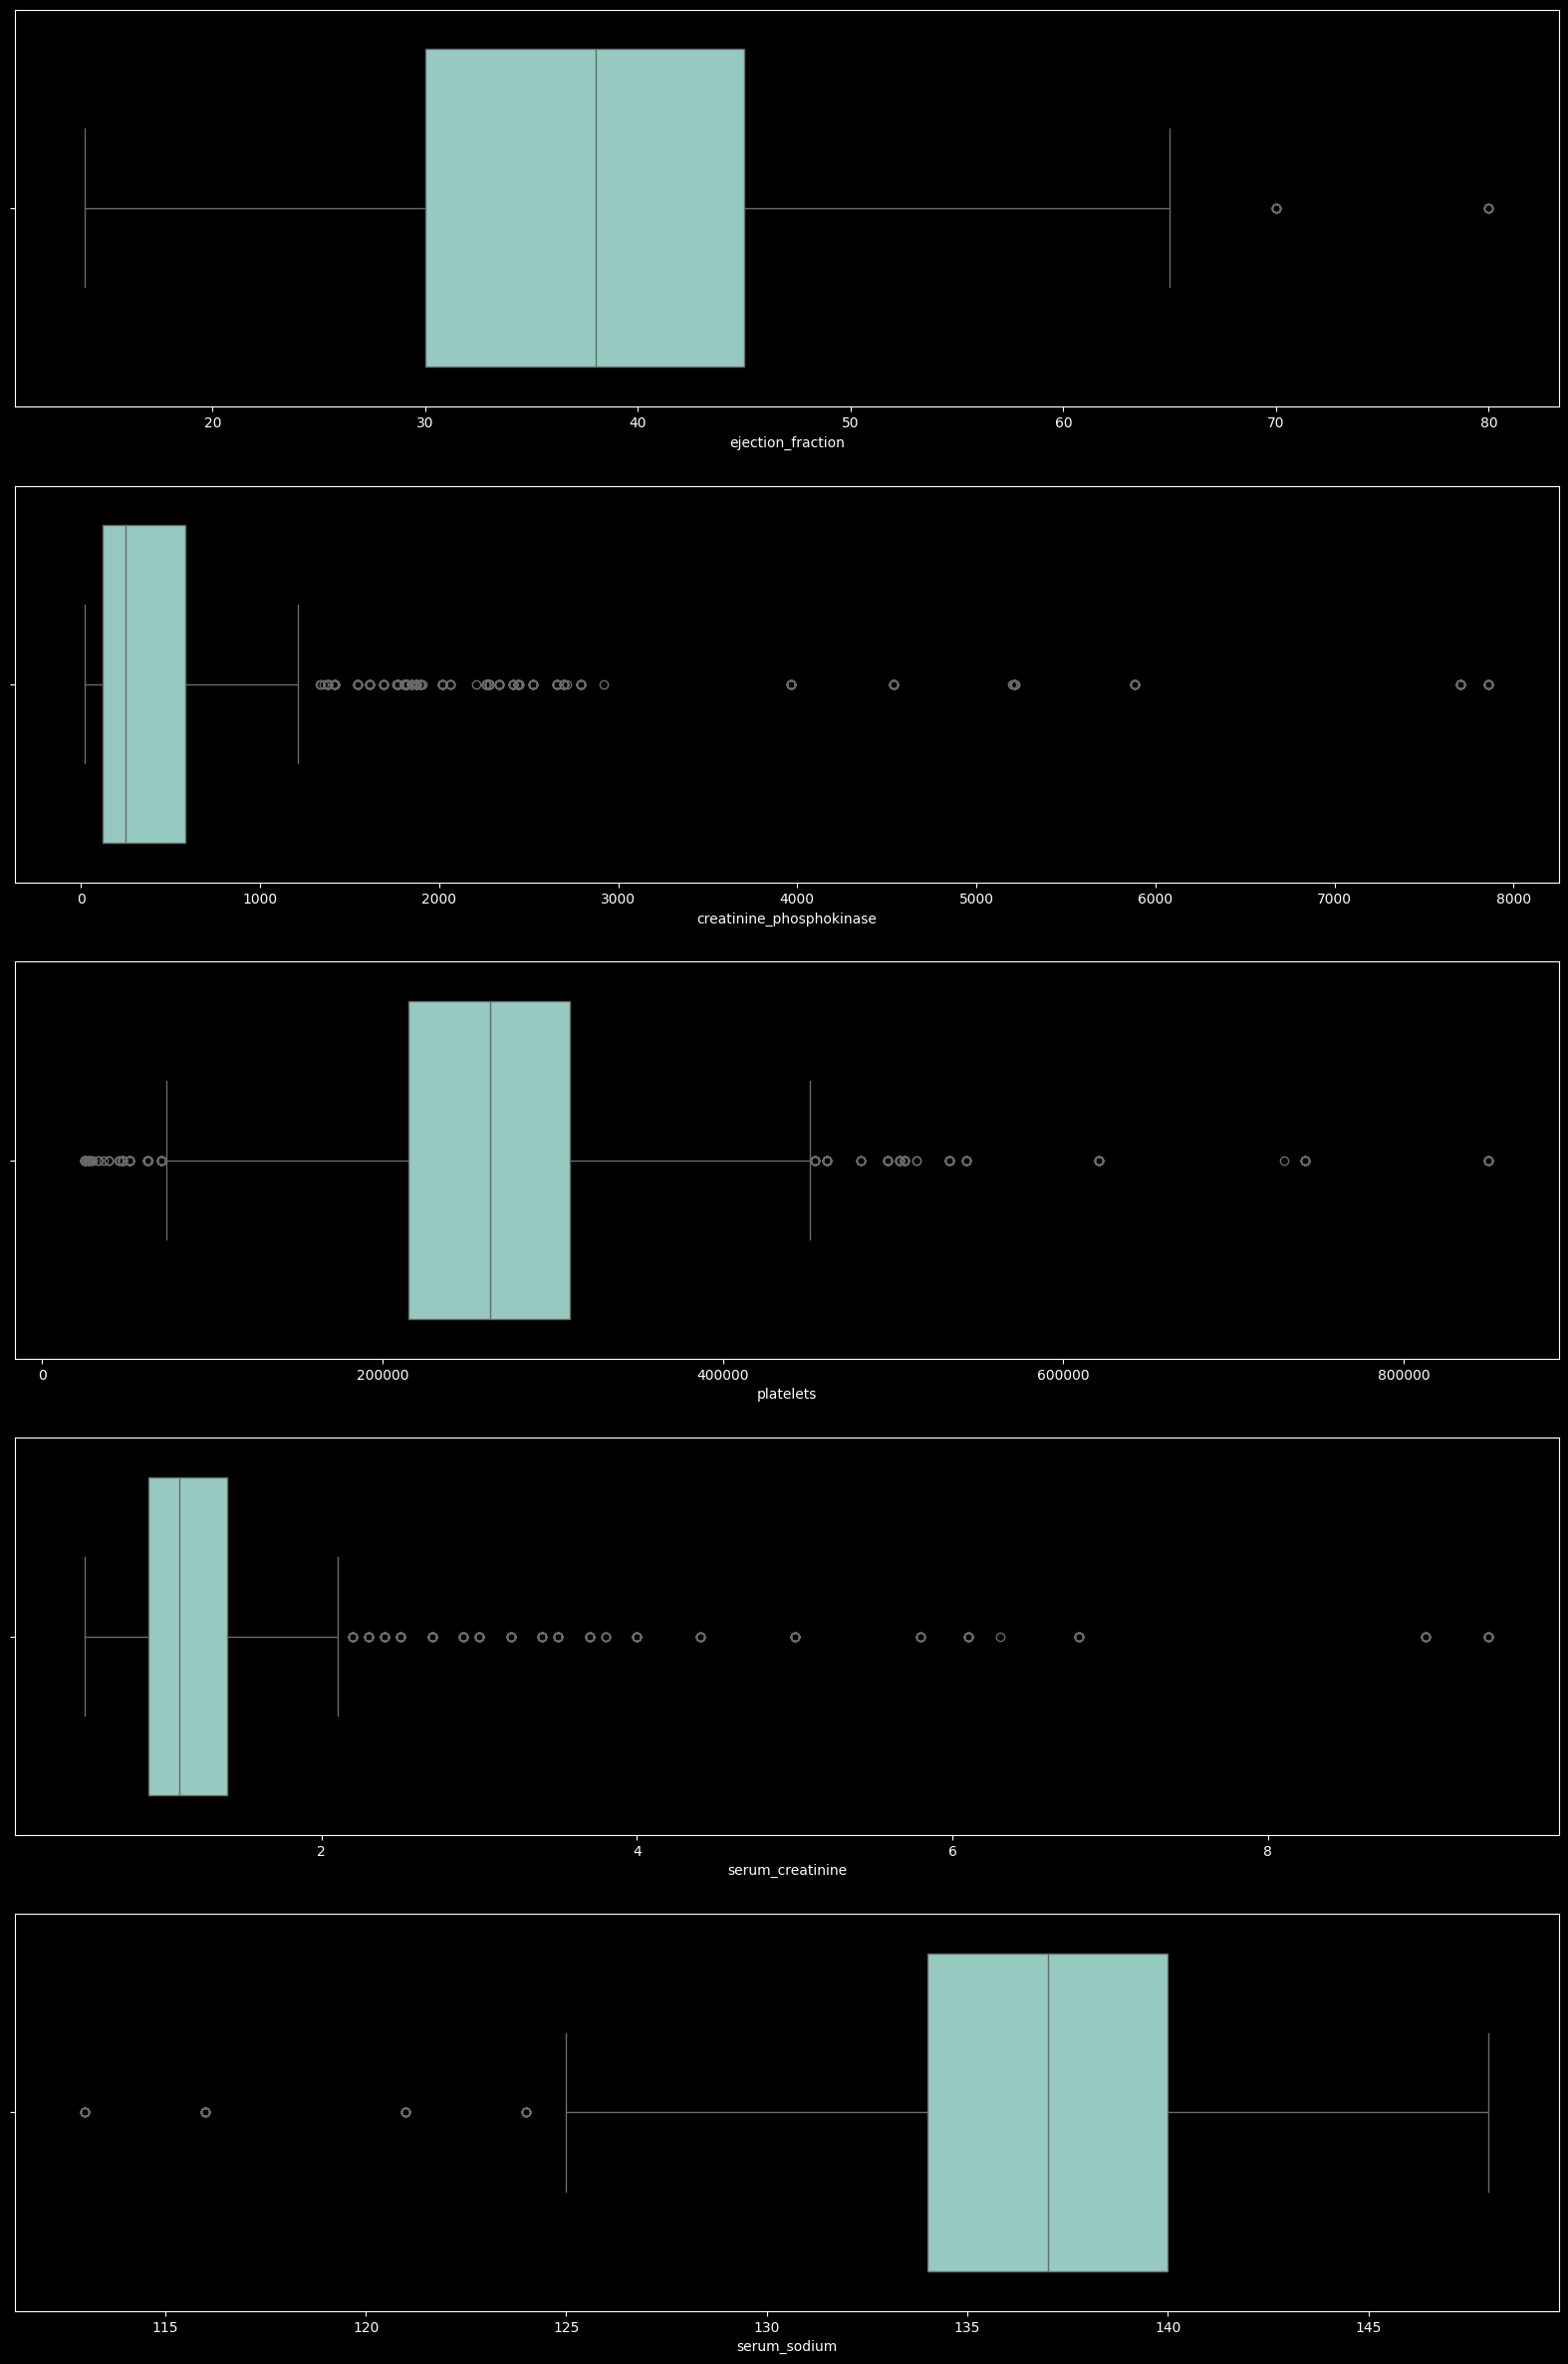

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(20,30))

plt.subplot(5,1,1)
sns.boxplot(x='ejection_fraction',data=df)

plt.subplot(5,1,2)
sns.boxplot(x='creatinine_phosphokinase',data=df)

plt.subplot(5,1,3)
sns.boxplot(x='platelets',data=df)

plt.subplot(5,1,4)
sns.boxplot(x='serum_creatinine',data=df)

plt.subplot(5,1,5)
sns.boxplot(x='serum_sodium',data=df)

plt.show()

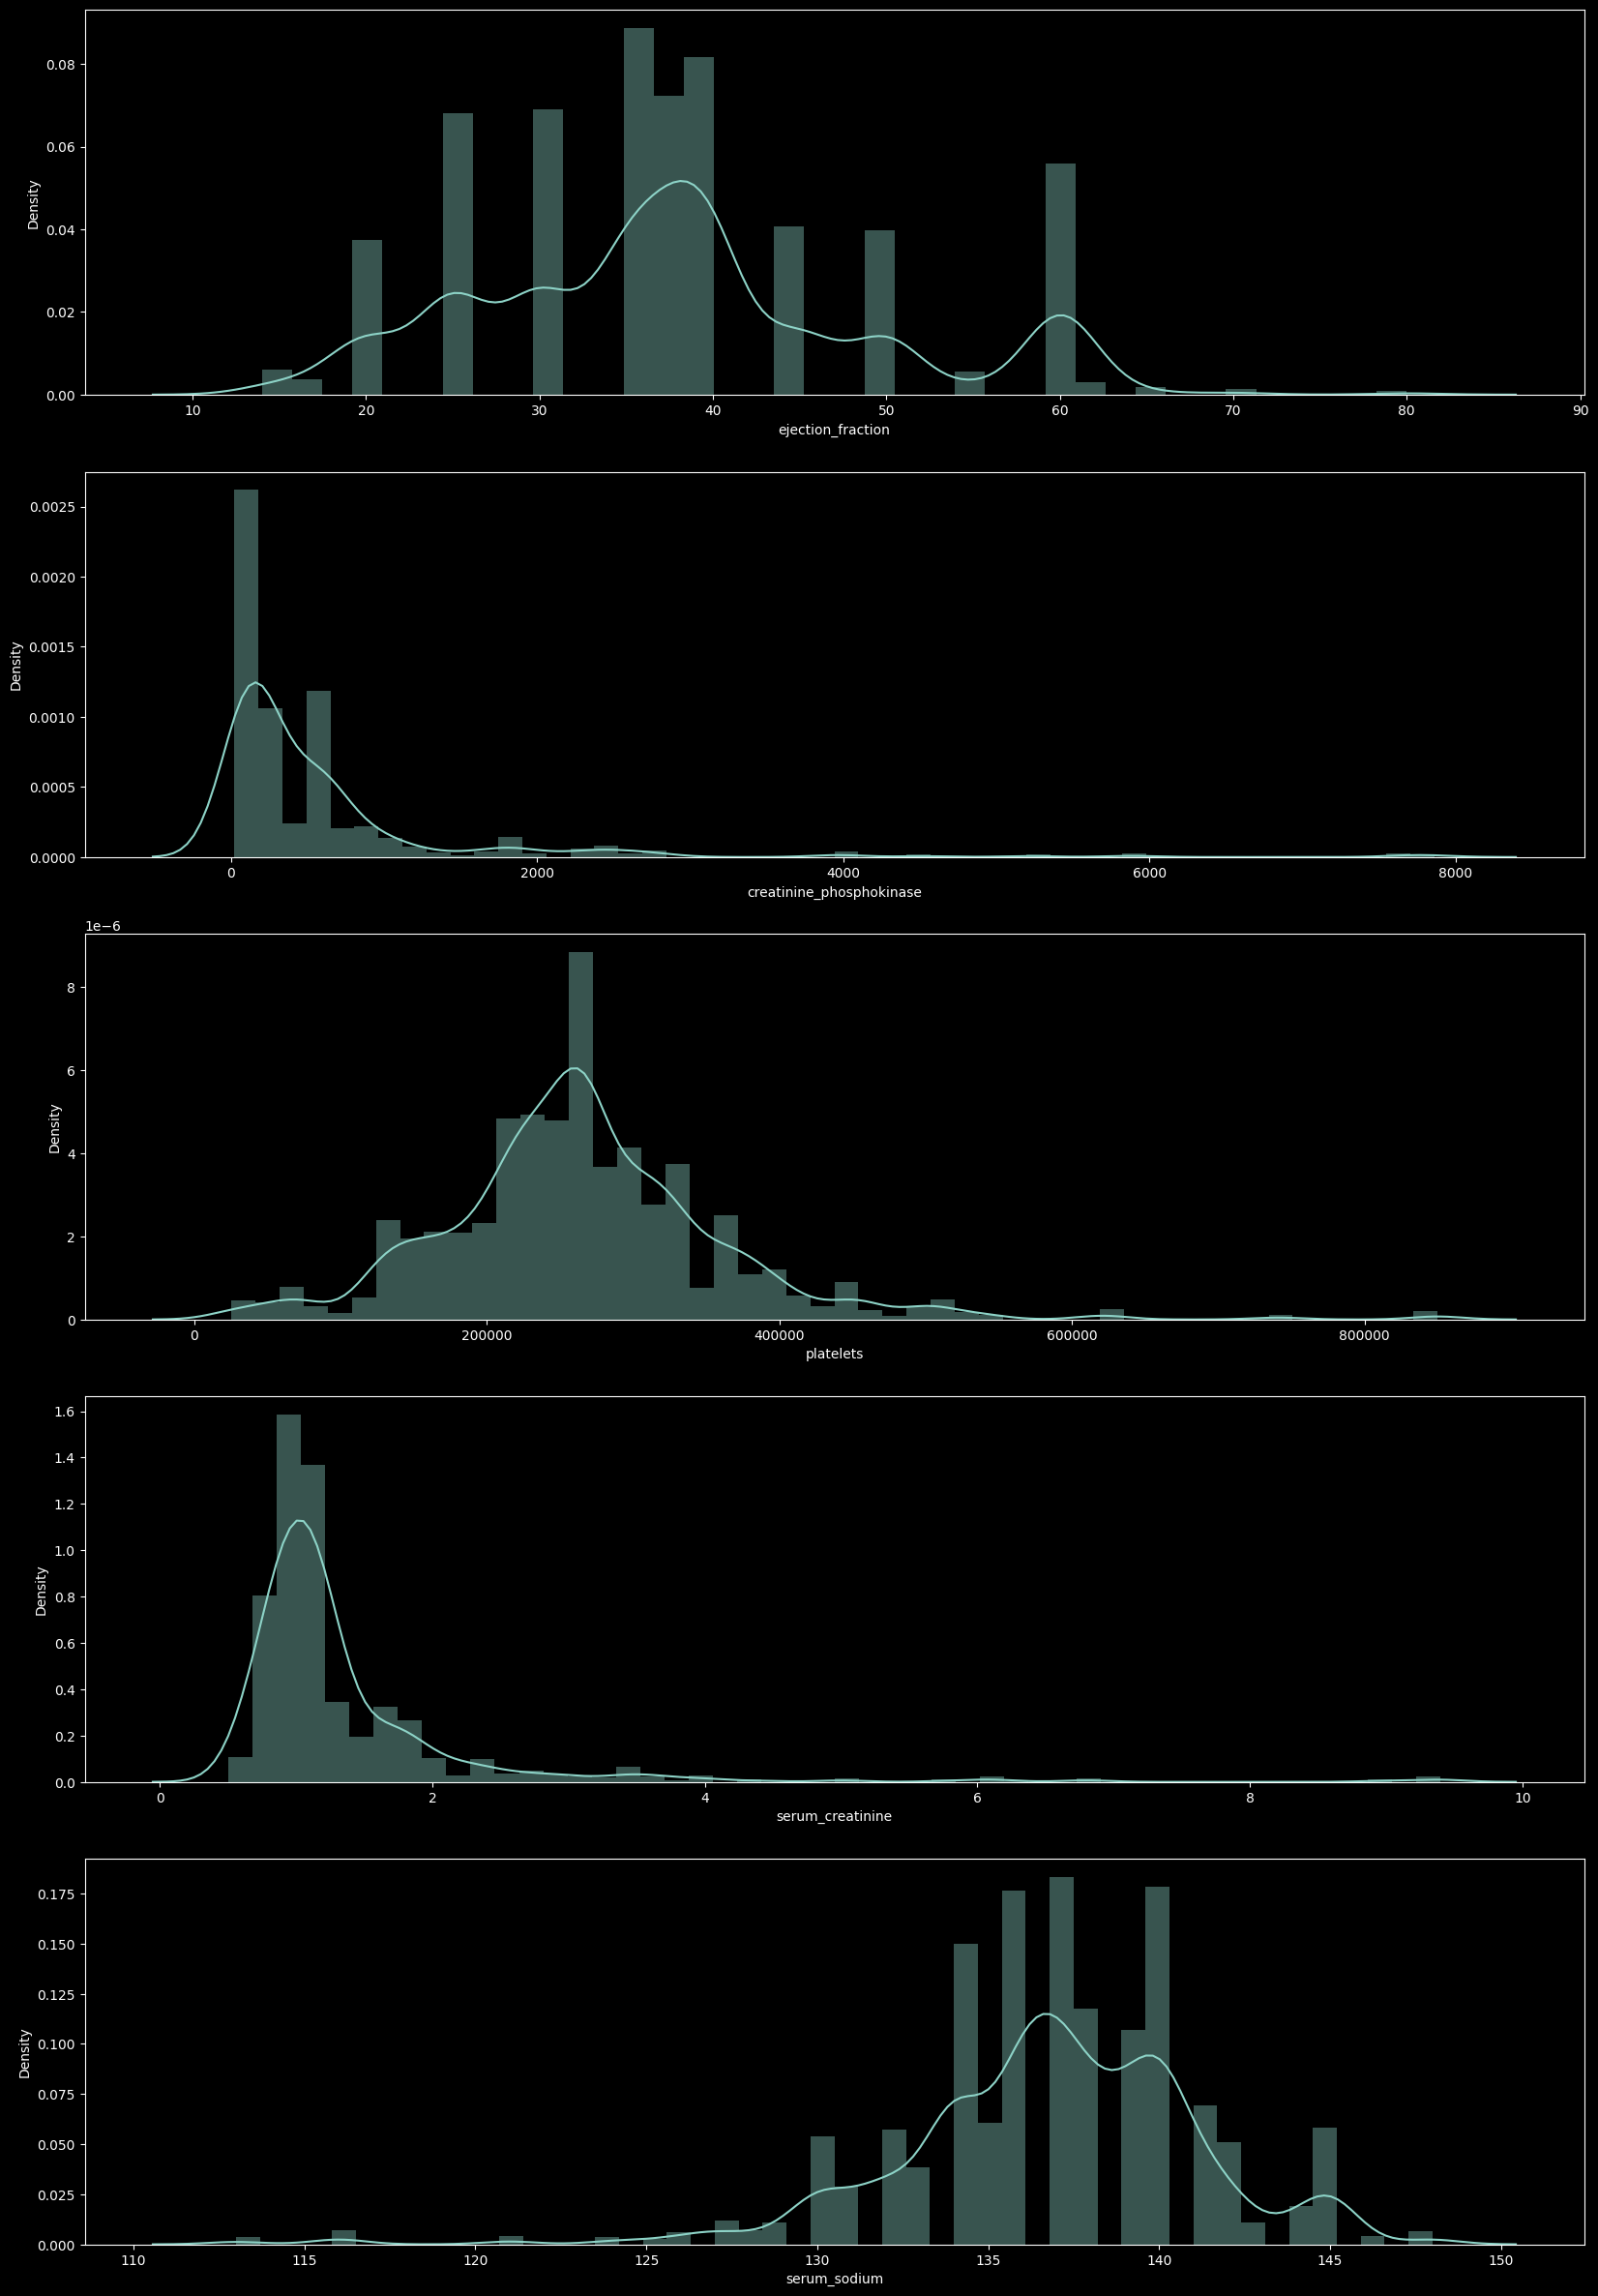

In [24]:
plt.figure(figsize=(20,30))

plt.subplot(5,1,1)
sns.distplot(df['ejection_fraction'])

plt.subplot(5,1,2)
sns.distplot(df['creatinine_phosphokinase'])

plt.subplot(5,1,3)
sns.distplot(df['platelets'])

plt.subplot(5,1,4)
sns.distplot(df['serum_creatinine'])

plt.subplot(5,1,5)
sns.distplot(df['serum_sodium'])

plt.show()

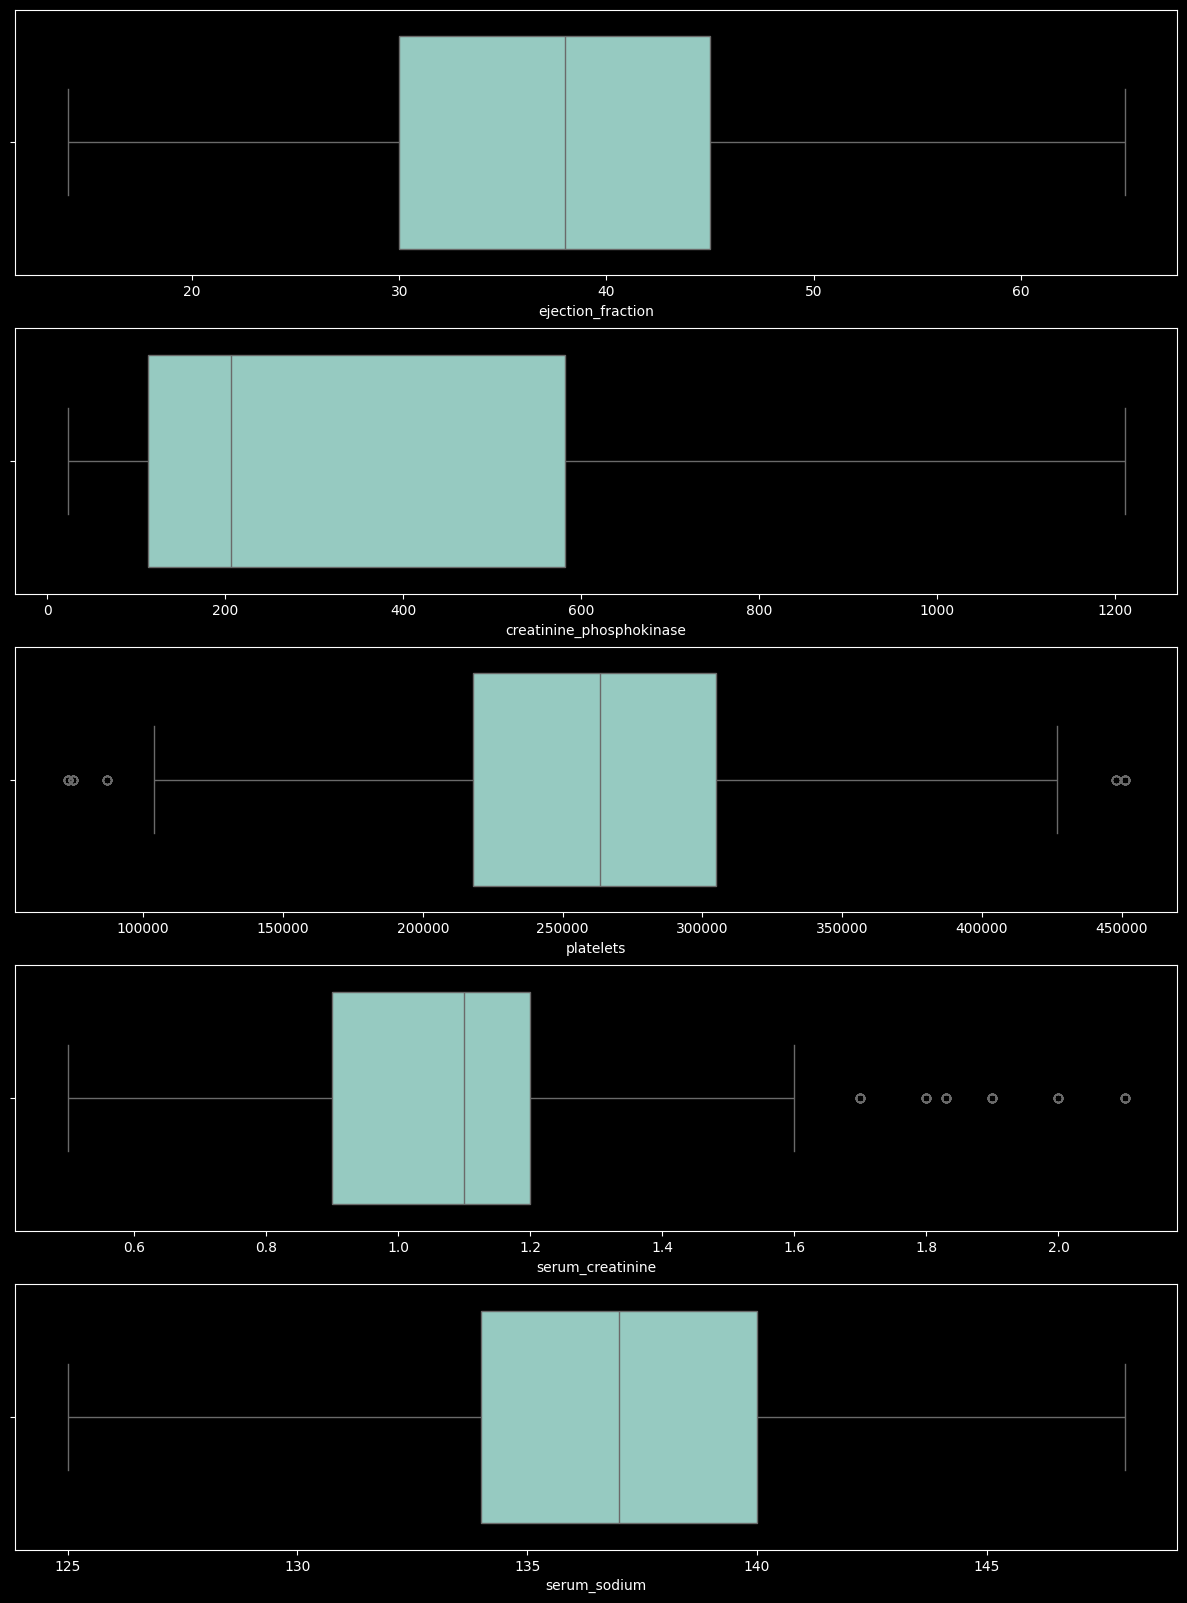

In [25]:
import pandas as pd
import numpy as np

# Assuming 'df' is your DataFrame

# Calculate the first and third quartiles
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)

# Calculate the interquartile range (IQR)
IQR = Q3 - Q1

# Define the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter the DataFrame to remove outliers
df_no_outliers = df[(df >= lower_bound) & (df <= upper_bound)]

# Plot boxplots without outliers
plt.figure(figsize=(15, 20))  # Increased size to (10, 15)

plt.subplot(5, 1, 1)
sns.boxplot(x='ejection_fraction', data=df_no_outliers)

plt.subplot(5, 1, 2)
sns.boxplot(x='creatinine_phosphokinase', data=df_no_outliers)

plt.subplot(5, 1, 3)
sns.boxplot(x='platelets', data=df_no_outliers)

plt.subplot(5, 1, 4)
sns.boxplot(x='serum_creatinine', data=df_no_outliers)

plt.subplot(5, 1, 5)
sns.boxplot(x='serum_sodium', data=df_no_outliers)

plt.show()

In [26]:
df.head(10)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,55.0,0,748,0,45,0,263358.03,1.3,137,1,1,88,0
1,65.0,0,56,0,25,0,305000.00,5.0,130,1,0,207,0
2,45.0,0,582,1,38,0,319000.00,0.9,140,0,0,244,0
3,60.0,1,754,1,40,1,328000.00,1.2,126,1,0,90,0
4,95.0,1,582,0,30,0,461000.00,2.0,132,1,0,50,1
5,70.0,0,232,1,30,0,302000.00,1.2,132,1,0,210,0
6,63.0,1,122,1,60,0,172000.00,1.2,145,0,0,147,0
7,70.0,1,171,0,50,1,358000.00,0.9,141,0,0,196,0
8,50.0,0,482,1,30,0,300000.00,0.9,132,1,0,109,0
9,53.0,1,446,0,45,1,274000.00,1.0,133,1,0,215,0


In [27]:
from sklearn.preprocessing import StandardScaler

# Assuming 'df' is your DataFrame with the specified features

# Select the features to scale
features_to_scale = ['age','ejection_fraction', 'creatinine_phosphokinase', 'platelets', 'serum_creatinine', 'serum_sodium', 'time']

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the selected features
df_scaled = df.copy()  # Create a copy of the DataFrame
df_scaled[features_to_scale] = scaler.fit_transform(df_scaled[features_to_scale])

# Now 'df_scaled' contains the scaled features


In [28]:
df_scaled.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,-0.452181,0,0.165097,0,0.631022,0,-0.017526,-0.068446,0.042968,1,1,-0.551989,0
1,0.402807,0,-0.543458,0,-1.106039,0,0.407436,3.596194,-1.525206,1,0,0.987105,0
2,-1.307168,0,-0.004874,1,0.023051,0,0.550307,-0.464623,0.715043,0,0,1.465647,0
3,-0.024687,1,0.171240,1,0.196757,1,0.642154,-0.167490,-2.421306,1,0,-0.526122,0
4,2.967771,1,-0.004874,0,-0.671773,0,1.999435,0.624865,-1.077157,1,0,-1.043465,1


In [29]:
dup=df.duplicated().sum()
dup

3680

In [30]:
df.drop_duplicates(inplace=True)

In [31]:
df.shape

(1320, 13)

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1320 entries, 0 to 4972
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       1320 non-null   float64
 1   anaemia                   1320 non-null   int64  
 2   creatinine_phosphokinase  1320 non-null   int64  
 3   diabetes                  1320 non-null   int64  
 4   ejection_fraction         1320 non-null   int64  
 5   high_blood_pressure       1320 non-null   int64  
 6   platelets                 1320 non-null   float64
 7   serum_creatinine          1320 non-null   float64
 8   serum_sodium              1320 non-null   int64  
 9   sex                       1320 non-null   int64  
 10  smoking                   1320 non-null   int64  
 11  time                      1320 non-null   int64  
 12  DEATH_EVENT               1320 non-null   int64  
dtypes: float64(3), int64(10)
memory usage: 144.4 KB


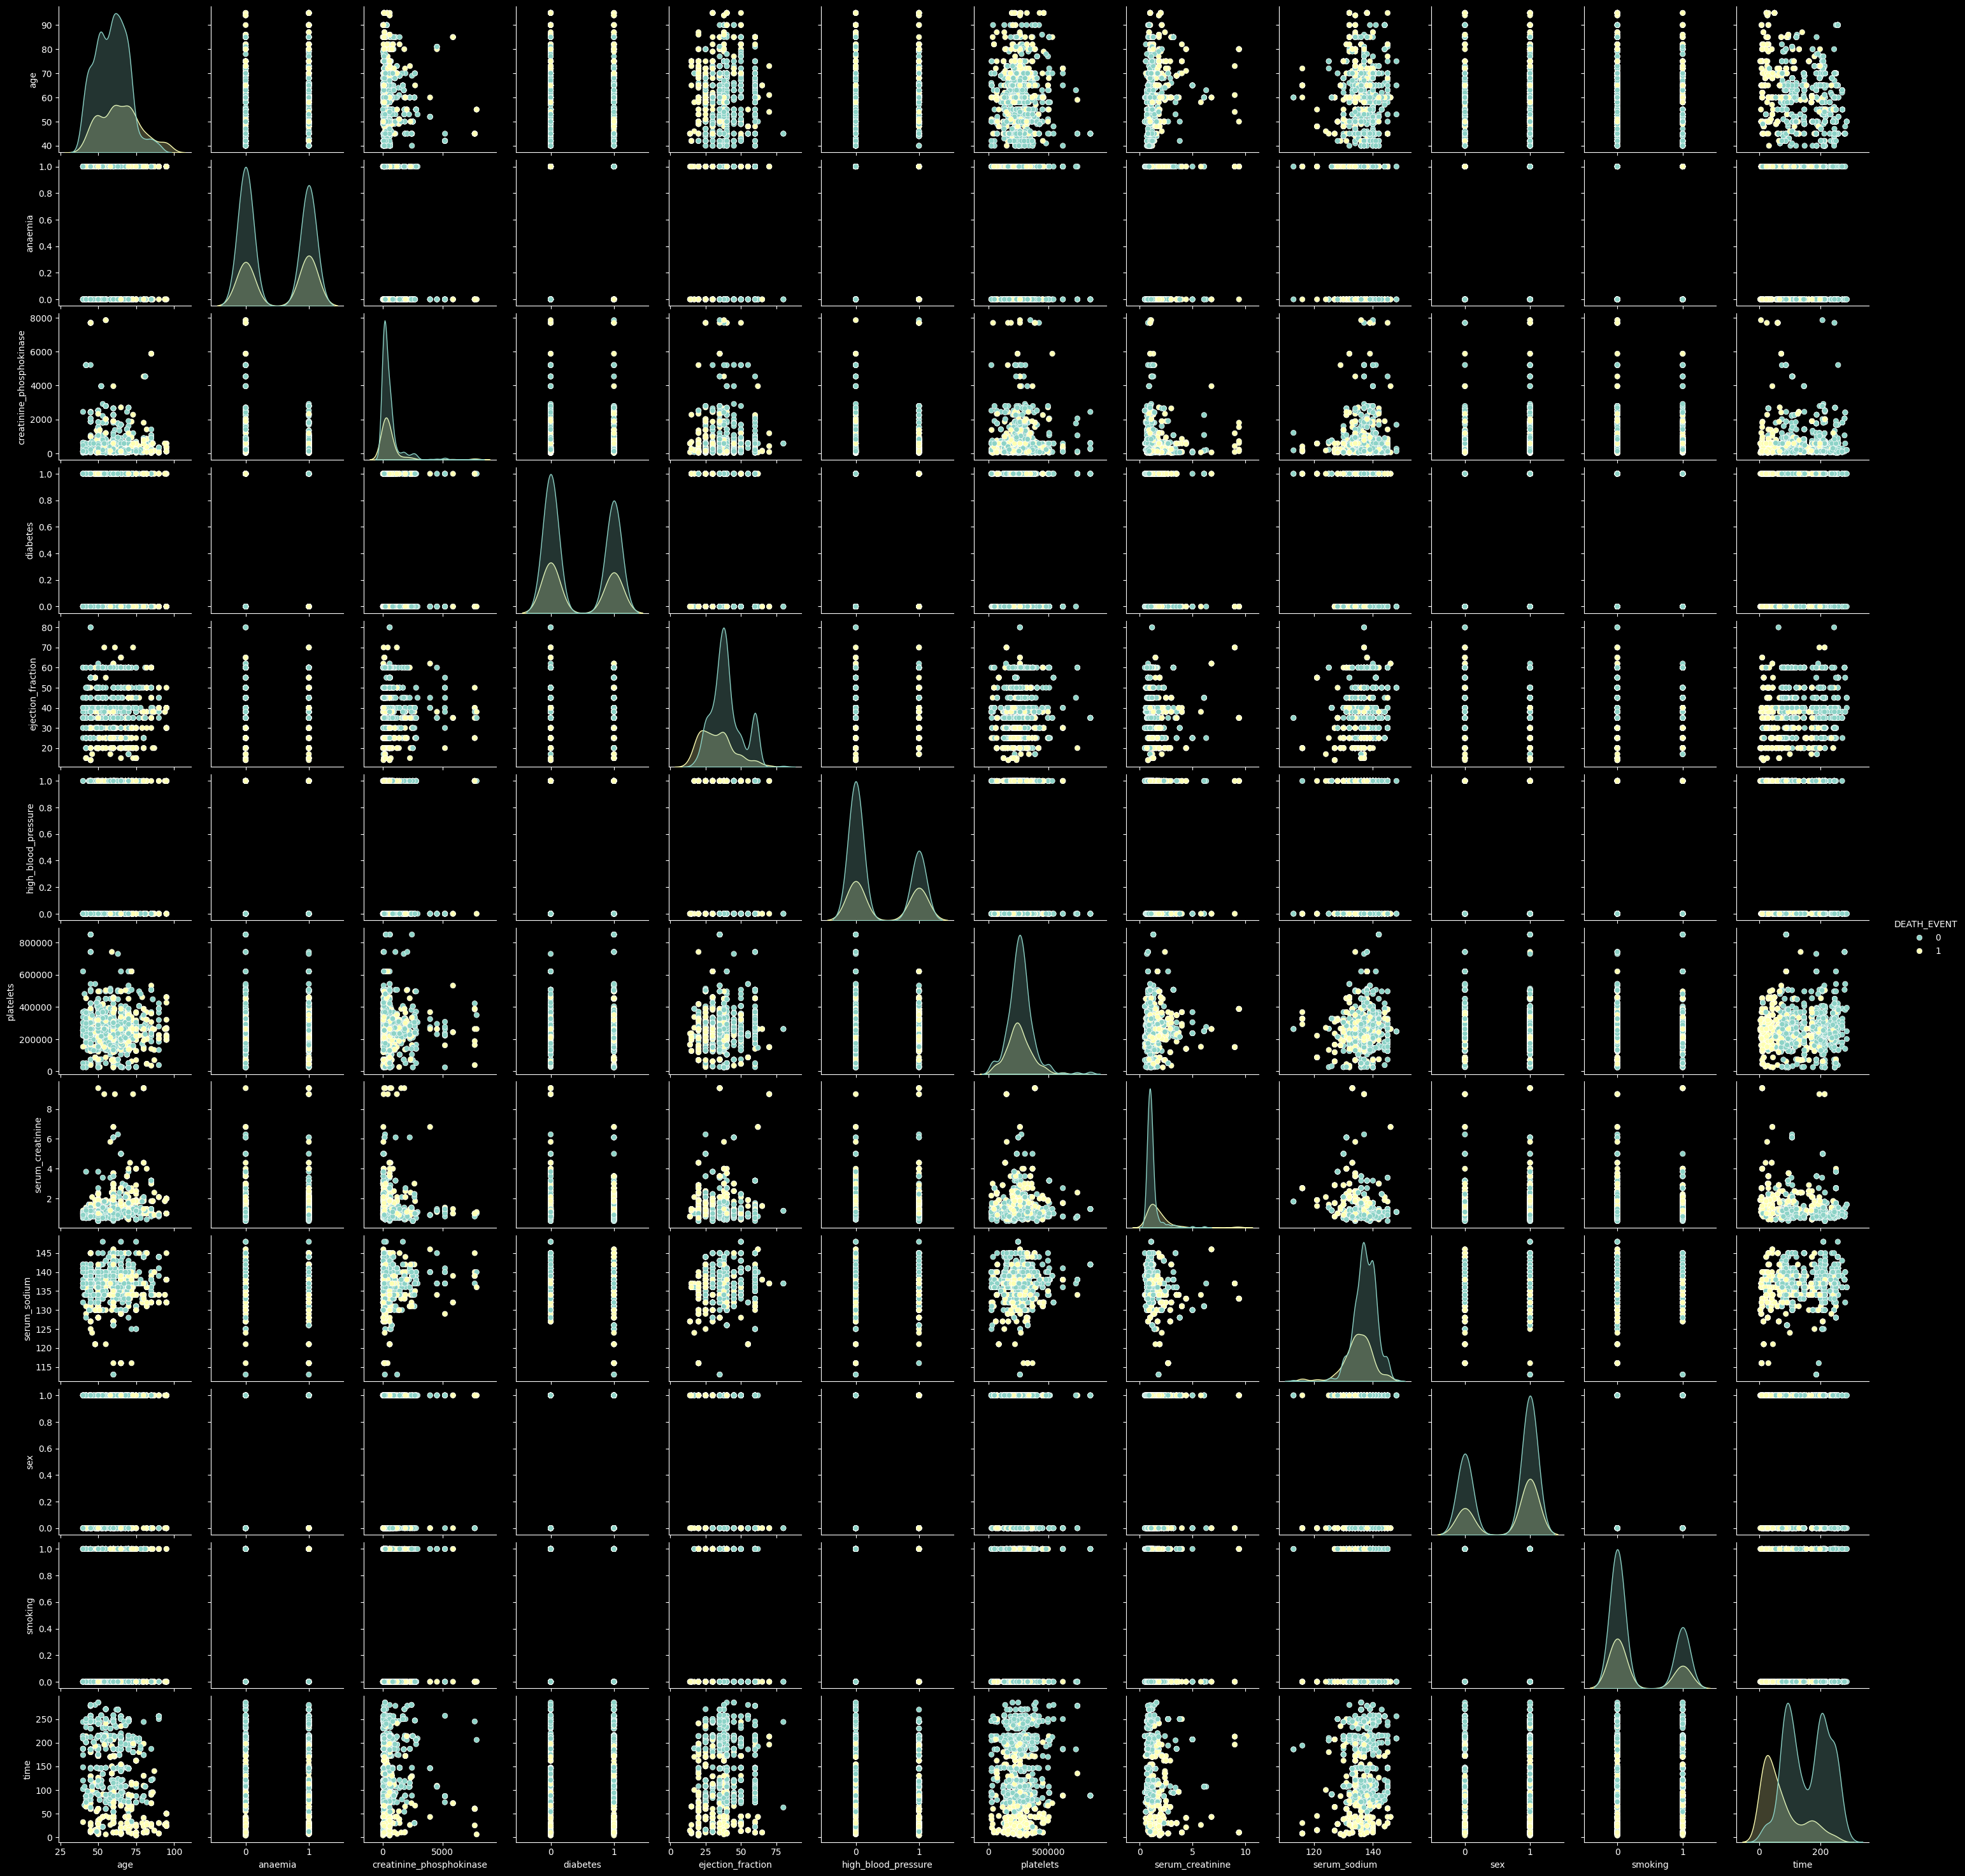

In [33]:
sns.pairplot(df, hue='DEATH_EVENT')

In [34]:
# Step 1: Split the data into features (X) and target variable (y)
X = df_scaled.drop(columns=['DEATH_EVENT'])  # Features
y = df_scaled['DEATH_EVENT']  # Target variable

# Step 2: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Train each classifier on the training data
classifiers = {
    'KNN': KNeighborsClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'Logistic Regression': LogisticRegression(),
    'SVM': SVC()
}

for name, classifier in classifiers.items():
    classifier.fit(X_train, y_train)

    # Step 4: Evaluate each classifier's performance on the testing data
    y_pred = classifier.predict(X_test)


    precision, recall, f1_score, support = precision_recall_fscore_support(y_test, y_pred, average='binary')

    print(f"Classifier: {name}")
    print(f"Precision: {precision}")
    print(f"Recall: {recall}")
    print(f"F1-score: {f1_score}")
    print(f"Support: {support}")
    print(f"Classifier: {name}")
    print(classification_report(y_test, y_pred))
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print()

Classifier: KNN
Precision: 0.9704918032786886
Recall: 0.9801324503311258
F1-score: 0.9752883031301484
Support: None
Classifier: KNN
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       698
           1       0.97      0.98      0.98       302

    accuracy                           0.98      1000
   macro avg       0.98      0.98      0.98      1000
weighted avg       0.99      0.98      0.99      1000

Accuracy: 0.985

Classifier: Random Forest
Precision: 0.980327868852459
Recall: 0.9900662251655629
F1-score: 0.9851729818780889
Support: None
Classifier: Random Forest
              precision    recall  f1-score   support

           0       1.00      0.99      0.99       698
           1       0.98      0.99      0.99       302

    accuracy                           0.99      1000
   macro avg       0.99      0.99      0.99      1000
weighted avg       0.99      0.99      0.99      1000

Accuracy: 0.991

Classifier: Decision Tree
Pre

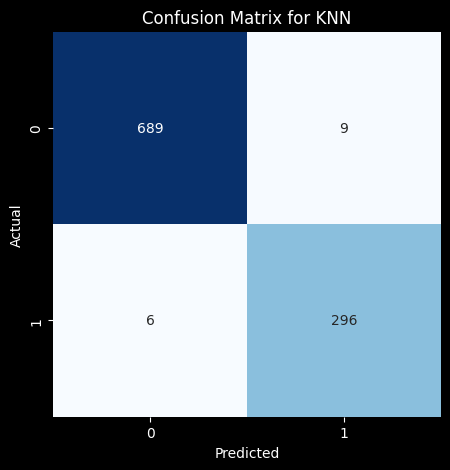

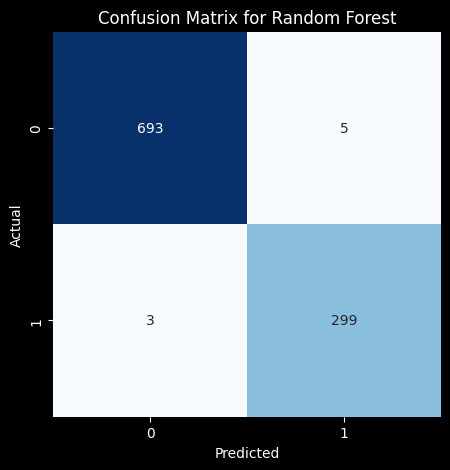

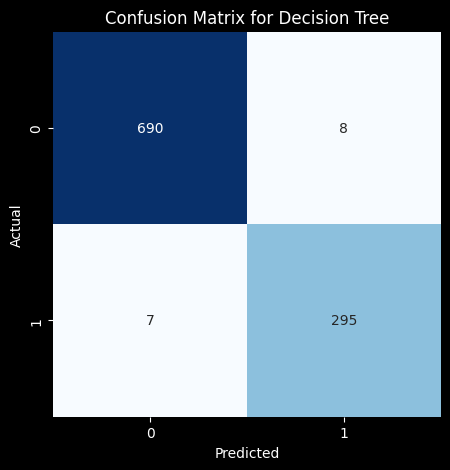

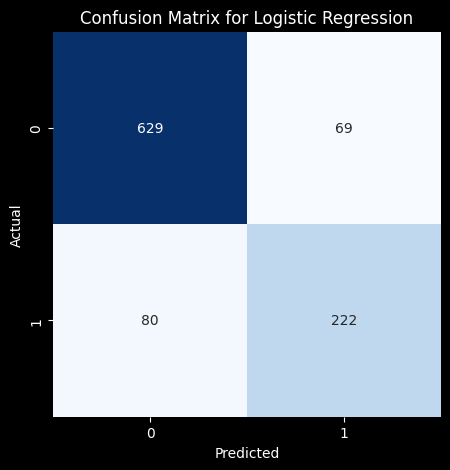

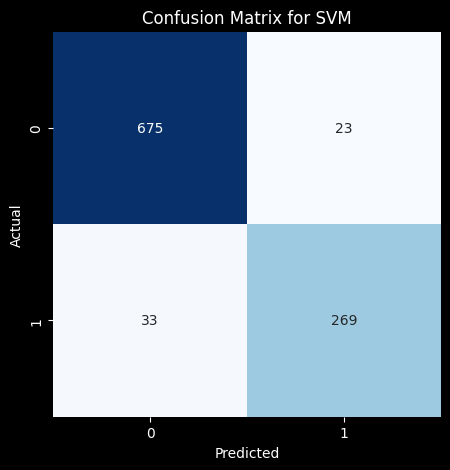

In [35]:
# Visualize confusion matrix
for name, classifier in classifiers.items():
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)

    # Calculate confusion matrix
    cm = confusion_matrix(y_test, y_pred)

    # Plot confusion matrix as heatmap
    plt.figure(figsize=(5, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title(f'Confusion Matrix for {name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()